<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the data into a pandas DataFrame
pokemon_data = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')

# Display the first few rows of the DataFrame
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

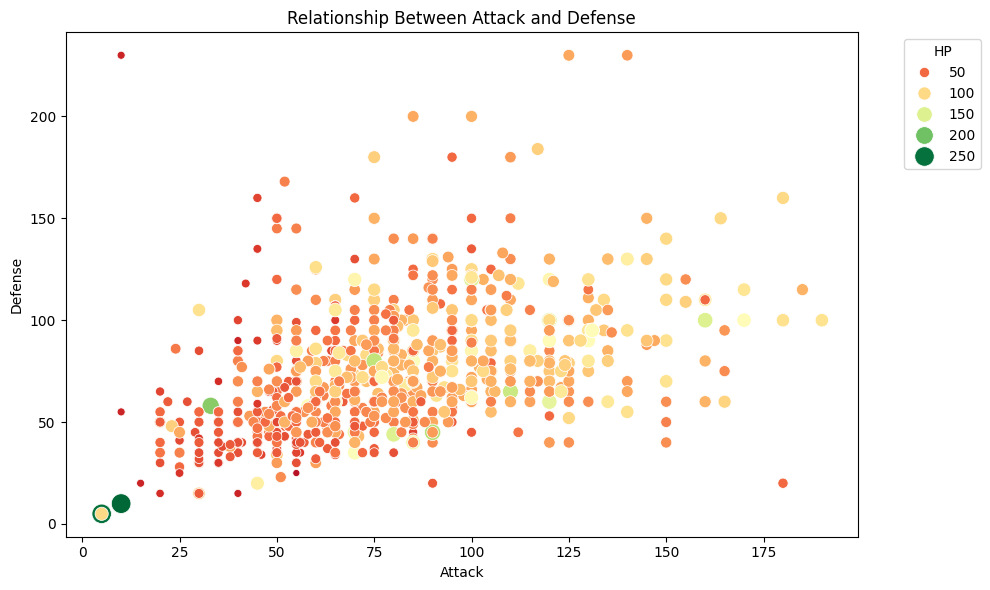

In [14]:
# Q1: Scatter plot of Attack vs. Defense with hue for HP
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=pokemon_data,
    x="Attack",
    y="Defense",
    hue="HP",
    palette="RdYlGn",
    size="HP",
    sizes=(20, 200)
)
scatter_plot.set_title("Relationship Between Attack and Defense")
scatter_plot.set_xlabel("Attack")
scatter_plot.set_ylabel("Defense")
plt.legend(title="HP", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


While the data points look a little messy, a slight positive correlation can be seen between attack and defense. It looks like the base defense goes up slightly with more attack as there are only 2 Pokemon with ~25 defense at 90 and 180 attack. Another thing I'd like to note is that the Pokemon with higher HP tend to have lower attack and defense, which makes sense as they would be overpowered otherwise.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

<Figure size 1000x600 with 0 Axes>

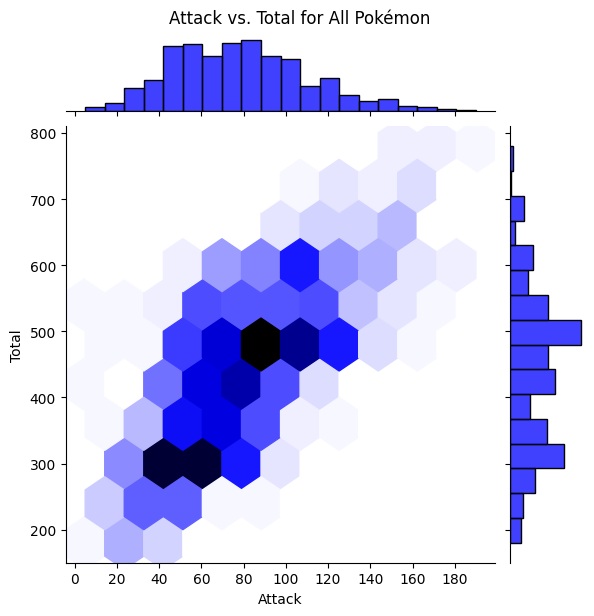

In [15]:
# Q2: Hexbin plot of Attack vs. Total
plt.figure(figsize=(10, 6))
hexbin_plot = sns.jointplot(
    data=pokemon_data,
    x="Attack",
    y="Total",
    kind="hex",
    color="blue",
    gridsize=10,
)
hexbin_plot.figure.suptitle("Attack vs. Total for All Pokémon", y=1.02)
hexbin_plot.ax_joint.set_xticks(range(0, pokemon_data["Attack"].max() + 10, 20))
plt.show()


The plot, as mentioned in the question, shows a linear relationship between Attack and Total, however there is more to the plot. First, the colors shows the density of data points, where we can see 3 distinct groupings. First, there is a relatively dense area where Pokemon with 30-70 attack have roughly 275-325 total stats. Second, there is another hotspot where Pokemon with roughly 450-500 total stats have 80-100 attack. Additionally, the plot also shows the marginal distributions for both attack and total stats, showing their individual distributions, where we can see Total has 2 peaks at 500 and 300, and Attack has 2 peaks at 40-60 and 80, with both have a slight right skew.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

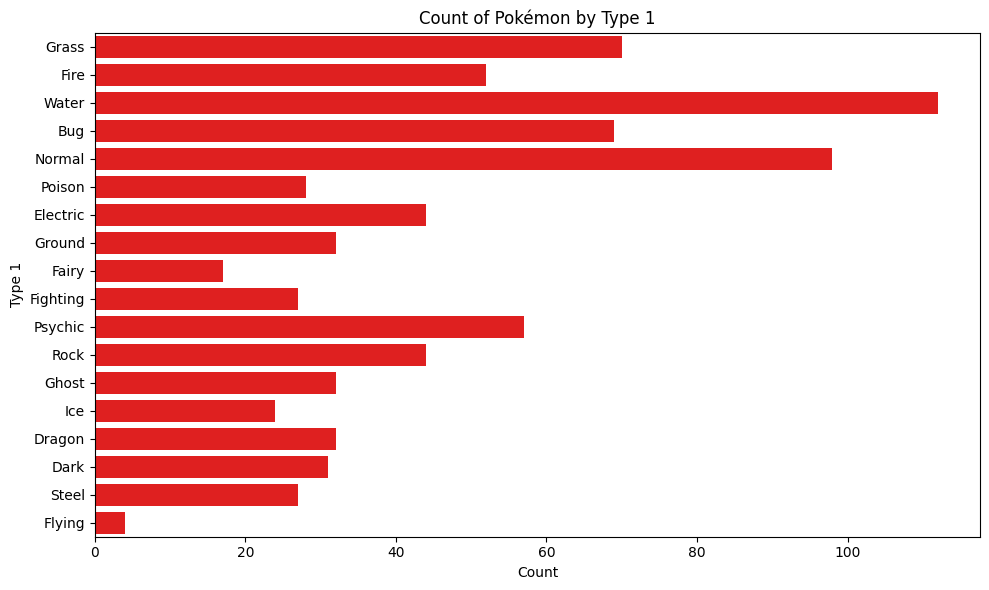

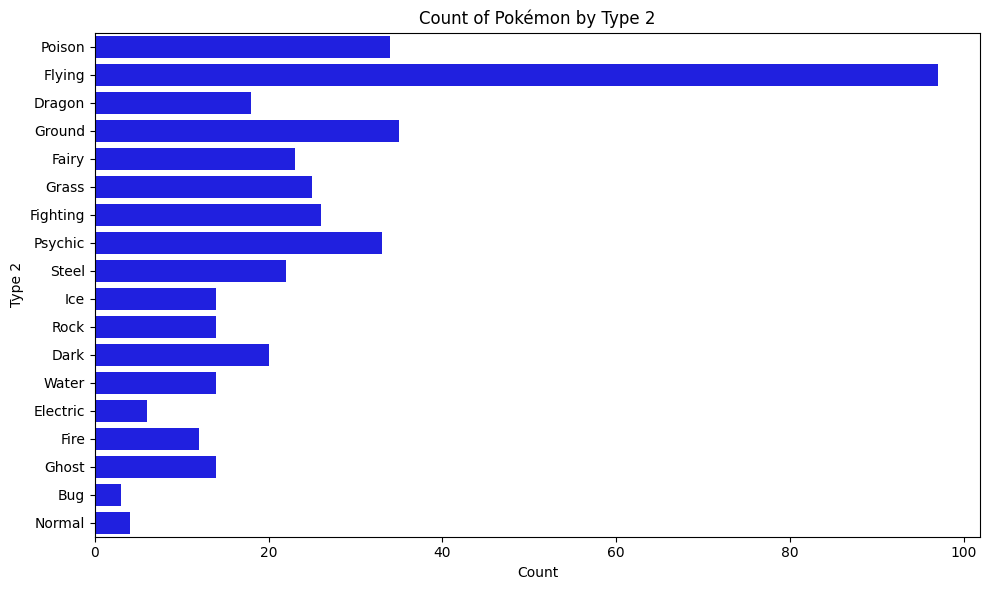

In [16]:
# Your code here . . .
# Q3: Categorical plots for Type 1 and Type 2 Pokémon
plt.figure(figsize=(10, 6))
type1_countplot = sns.countplot(y="Type 1", data=pokemon_data, color="red")
type1_countplot.set_title("Count of Pokémon by Type 1")
type1_countplot.set_xlabel("Count")
type1_countplot.set_ylabel("Type 1")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
type2_countplot = sns.countplot(y="Type 2", data=pokemon_data, color="blue")
type2_countplot.set_title("Count of Pokémon by Type 2")
type2_countplot.set_xlabel("Count")
type2_countplot.set_ylabel("Type 2")
plt.tight_layout()
plt.show()


### Answer:

The top 3 most common types of Pokemon by Type 1 are  Water with ~115 counts, Grass with ~100 counts, and Grass with ~70 counts.
The top 3 least common types of Pokemon by Type 1 are Flying with ~4 counts, Fairy with ~17, and Ice with ~24.

The top 3 most common types of Pokemon by Type 2 are Flying with ~97 counts, Ground with ~36 counts, and Poison with ~35 counts.
The top 3 least common types of Pokemon by Type 2 are Bug with ~3 counts, Normal with ~4 counts, and Electric with ~8 counts.